# Food Delivery Data Cleaning & Feature Engineering

## Objective
This notebook documents the data cleaning, preprocessing, and feature engineering
performed on restaurant and order-level datasets used in the
Restaurant Analytics & Order Prediction Dashboard.

## Key Activities
- Handling missing values and inconsistent records
- Cleaning monetary and time-based fields
- Feature preparation for predictive modeling
- Dataset validation for dashboard analytics

This notebook supports the analytical foundation of the Streamlit dashboard
and demonstrates applied business analytics skills.


In [1]:
import pandas as pd
from IPython.display import display

order_history = pd.read_csv("order_history_kaggle_data.csv")
indian_restaurants = pd.read_csv("indian_restaurants.csv")

display(order_history.head())
display(indian_restaurants.head())



,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


,restaurant_name,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not,location
0,# Momo,4.2,200,34,0,0,0,0,0,0,Durgapur
1,#99,4.1,100,31,0,0,0,0,0,0,Bareilly
2,#BBQ,3.6,200,57,0,0,1,0,0,0,Mangalore
3,#Dilliwaala6,3.7,100,38,0,1,0,1,0,0,Puducherry
4,#FlyFree,4.0,200,26,0,0,1,0,0,0,Ajmer


In [ ]:
print("ORDER HISTORY")
order_history.info()

print("\nINDIAN RESTAURANTS")
indian_restaurants.info()



ORDER HISTORY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-

In [ ]:
print("ORDER HISTORY – Missing values")
print(order_history.isnull().sum())

print("\nINDIAN RESTAURANTS – Missing values")
print(indian_restaurants.isnull().sum())

print("\nSWIGGY – Missing values")
print(swiggy.isnull().sum())


ORDER HISTORY – Missing values
Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold disc

In [4]:
order_clean = order_history.copy()

In [ ]:
order_clean.columns = (
    order_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)


In [6]:
order_clean.columns


Index(['restaurant_id', 'restaurant_name', 'subzone', 'city', 'order_id',
       'order_placed_at', 'order_status', 'delivery', 'distance',
       'items_in_order', 'instructions', 'discount_construct', 'bill_subtotal',
       'packaging_charges', 'restaurant_discount_(promo)',
       'restaurant_discount_(flat_offs,_freebies_&_others)', 'gold_discount',
       'brand_pack_discount', 'total', 'rating', 'review',
       'cancellation___rejection_reason',
       'restaurant_compensation_(cancellation)',
       'restaurant_penalty_(rejection)', 'kpt_duration_(minutes)',
       'rider_wait_time_(minutes)', 'order_ready_marked',
       'customer_complaint_tag', 'customer_id'],
      dtype='object')

In [ ]:
order_clean['order_placed_datetime'] = pd.to_datetime(
    order_clean['order_placed_at'],
    errors='coerce'
)

order_clean[['order_placed_at', 'order_placed_datetime']].head()


/var/folders/7f/jfbkbms97s357cjcpf_hf1_00000gn/T/ipykernel_27098/3375964977.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_clean['order_placed_datetime'] = pd.to_datetime(


,order_placed_at,order_placed_datetime
0,"11:38 PM, September 10 2024",2024-09-10 23:38:00
1,"11:34 PM, September 10 2024",2024-09-10 23:34:00
2,"03:52 PM, September 10 2024",2024-09-10 15:52:00
3,"03:45 PM, September 10 2024",2024-09-10 15:45:00
4,"03:04 PM, September 10 2024",2024-09-10 15:04:00


In [8]:
order_clean['order_placed_datetime'].isna().sum()


np.int64(0)

In [ ]:
money_cols = [
    'bill_subtotal',
    'packaging_charges',
    'restaurant_discount_(promo)',
    'restaurant_discount_(flat_offs,_freebies_&_others)',
    'gold_discount',
    'brand_pack_discount',
    'total'
]

other_numeric_cols = [
    'rating',
    'distance',
    'kpt_duration_(minutes)',
    'rider_wait_time_(minutes)'
]

for col in money_cols:
    order_clean[col] = pd.to_numeric(order_clean[col], errors='coerce')

for col in other_numeric_cols:
    order_clean[col] = pd.to_numeric(order_clean[col], errors='coerce')

order_clean[money_cols + other_numeric_cols].describe()


,bill_subtotal,packaging_charges,restaurant_discount_(promo),"restaurant_discount_(flat_offs,_freebies_&_others)",gold_discount,brand_pack_discount,total,rating,distance,kpt_duration_(minutes),rider_wait_time_(minutes)
count,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,0.0,21026.000000,21153.000000
mean,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,NaN,17.332960,4.825070
std,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,NaN,6.283388,4.982591
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,NaN,0.000000,0.100000
25%,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,NaN,13.380000,1.000000
50%,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,NaN,16.330000,3.100000
75%,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,NaN,20.050000,7.400000
max,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,NaN,90.870000,73.800000


In [ ]:
order_clean['expected_total'] = (
    order_clean['bill_subtotal']
    + order_clean['packaging_charges']
    - order_clean['restaurant_discount_(promo)']
    - order_clean['restaurant_discount_(flat_offs,_freebies_&_others)']
    - order_clean['gold_discount']
    - order_clean['brand_pack_discount']
)

order_clean['total_difference'] = order_clean['total'] - order_clean['expected_total']

order_clean['total_difference'].describe()


count    2.132100e+04
mean     8.442381e-06
std      2.904419e-04
min     -9.094947e-13
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e-02
Name: total_difference, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import re

order_clean = pd.read_csv("order_history_kaggle_data.csv")

def clean_restaurant_name(name):
    if pd.isna(name):
        return np.nan
    name = name.lower()
    name = re.sub(r'[^a-z0-9\s]', '', name)   
    name = re.sub(r'\s+', ' ', name).strip()  
    return name

order_clean['restaurant_name_clean'] = order_clean['Restaurant name'].apply(clean_restaurant_name)

order_clean[['Restaurant name', 'restaurant_name_clean']].head()


,Restaurant name,restaurant_name_clean
0,Swaad,swaad
1,Swaad,swaad
2,Swaad,swaad
3,Swaad,swaad
4,Swaad,swaad


In [18]:
from rapidfuzz import process, fuzz

unique_names = order_clean['restaurant_name_clean'].dropna().unique()

def fuzzy_match(name, choices, threshold=90):
    match, score, _ = process.extractOne(name, choices, scorer=fuzz.token_sort_ratio)
    if score >= threshold:
        return match
    return name

order_clean['restaurant_name_master'] = order_clean['restaurant_name_clean'].apply(
    lambda x: fuzzy_match(x, unique_names)
)

print("Before standardization:", order_clean['restaurant_name_clean'].nunique())
print("After fuzzy standardization:", order_clean['restaurant_name_master'].nunique())


Before standardization: 6
After fuzzy standardization: 6


In [19]:
order_clean.isna().sum()

Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [ ]:
order_clean['Instructions'] = order_clean['Instructions'].fillna("")
order_clean['Discount construct'] = order_clean['Discount construct'].fillna("No Discount")
order_clean['Review'] = order_clean['Review'].fillna("")
order_clean['Cancellation / Rejection reason'] = order_clean['Cancellation / Rejection reason'].fillna("No Issue")
order_clean['Customer complaint tag'] = order_clean['Customer complaint tag'].fillna("No Complaint")

order_clean['Restaurant compensation (Cancellation)'] = order_clean['Restaurant compensation (Cancellation)'].fillna(0)
order_clean['Restaurant penalty (Rejection)'] = order_clean['Restaurant penalty (Rejection)'].fillna(0)

order_clean['KPT duration (minutes)'] = order_clean['KPT duration (minutes)'].fillna(order_clean['KPT duration (minutes)'].median())
order_clean['Rider wait time (minutes)'] = order_clean['Rider wait time (minutes)'].fillna(order_clean['Rider wait time (minutes)'].median())



In [ ]:
order_clean.columns = [c.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '').replace(',', '').replace('&', '') for c in order_clean.columns]

order_clean.columns


Index(['restaurant_id', 'restaurant_name', 'subzone', 'city', 'order_id',
       'order_placed_at', 'order_status', 'delivery', 'distance',
       'items_in_order', 'instructions', 'discount_construct', 'bill_subtotal',
       'packaging_charges', 'restaurant_discount_promo',
       'restaurant_discount_flat_offs_freebies__others', 'gold_discount',
       'brand_pack_discount', 'total', 'rating', 'review',
       'cancellation___rejection_reason',
       'restaurant_compensation_cancellation', 'restaurant_penalty_rejection',
       'kpt_duration_minutes', 'rider_wait_time_minutes', 'order_ready_marked',
       'customer_complaint_tag', 'customer_id', 'restaurant_name_clean',
       'restaurant_name_master'],
      dtype='object')

restaurant_name_master
aura pizzas             10751617.42
swaad                    3545521.86
tandoori junction         133665.95
dilli burger adda         101709.62
the chicken junction       12380.99
masala junction             9162.30
Name: total, dtype: float64


/var/folders/7f/jfbkbms97s357cjcpf_hf1_00000gn/T/ipykernel_27098/935947364.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_restaurant.index, y=revenue_by_restaurant.values, palette="viridis")


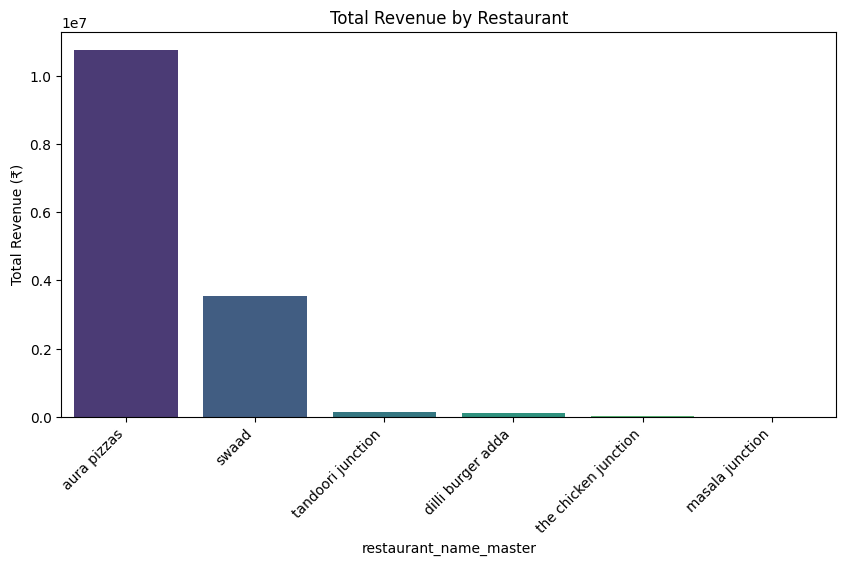

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

revenue_by_restaurant = order_clean.groupby('restaurant_name_master')['total'].sum().sort_values(ascending=False)
print(revenue_by_restaurant)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_restaurant.index, y=revenue_by_restaurant.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue (₹)")
plt.title("Total Revenue by Restaurant")
plt.show()


In [ ]:
order_clean['order_placed_datetime'] = pd.to_datetime(order_clean['order_placed_at'], errors='coerce')

order_clean['order_hour'] = order_clean['order_placed_datetime'].dt.hour
order_clean['order_day'] = order_clean['order_placed_datetime'].dt.day
order_clean['order_weekday'] = order_clean['order_placed_datetime'].dt.day_name()

order_clean[['order_placed_datetime','order_hour','order_weekday']].head()


/var/folders/7f/jfbkbms97s357cjcpf_hf1_00000gn/T/ipykernel_27098/1867566802.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_clean['order_placed_datetime'] = pd.to_datetime(order_clean['order_placed_at'], errors='coerce')


,order_placed_datetime,order_hour,order_weekday
0,2024-09-10 23:38:00,23,Tuesday
1,2024-09-10 23:34:00,23,Tuesday
2,2024-09-10 15:52:00,15,Tuesday
3,2024-09-10 15:45:00,15,Tuesday
4,2024-09-10 15:04:00,15,Tuesday


In [ ]:
order_clean['num_items'] = order_clean['items_in_order'].apply(lambda x: len(str(x).split(',')))

order_clean[['items_in_order','num_items']].head()


,items_in_order,num_items
0,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",2
1,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",3
2,1 x Bone in Peri Peri Grilled Chicken,1
3,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",2
4,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",2


In [ ]:
order_clean['total_discount'] = (
    order_clean['restaurant_discount_promo'] +
    order_clean['restaurant_discount_flat_offs_freebies__others'] +
    order_clean['gold_discount'] +
    order_clean['brand_pack_discount']
)

order_clean['revenue_after_discount'] = order_clean['total']

order_clean[['total', 'total_discount', 'revenue_after_discount']].head()


,total,total_discount,revenue_after_discount
0,666.75,80.0,666.75
1,1054.20,175.0,1054.20
2,241.50,80.0,241.50
3,567.00,80.0,567.00
4,529.20,80.0,529.20


In [ ]:
restaurant_summary = order_clean.groupby('restaurant_name_master').agg(
    total_revenue = ('total', 'sum'),
    avg_rating = ('rating', 'mean'),
    avg_order_size = ('num_items', 'mean'),
    late_delivery_rate = ('late_delivery_flag', 'mean'),
    total_orders = ('order_id', 'count')
).sort_values(by='total_revenue', ascending=False)

restaurant_summary.reset_index(inplace=True)
restaurant_summary.head()


,restaurant_name_master,total_revenue,avg_rating,avg_order_size,late_delivery_rate,total_orders
0,aura pizzas,10751617.42,4.318209,1.823000,0.009761,14548
1,swaad,3545521.86,4.425220,1.736892,0.009318,6332
2,tandoori junction,133665.95,4.652174,1.474026,0.006494,154
3,dilli burger adda,101709.62,4.175000,1.762115,0.013216,227
4,the chicken junction,12380.99,4.692308,1.656250,0.031250,32


In [ ]:
from sklearn.model_selection import train_test_split

X = order_clean[['num_items','total_discount','kpt_duration_minutes','rider_wait_time_minutes','delivery_delay']]
y = order_clean['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (17056, 5)
Test set size: (4265, 5)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 202.0376813963346
MSE: 128009.0454740969
R2: 0.48380847824909745


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)

y_pred_tuned = rf_random.predict(X_test)
print("Tuned MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("Tuned MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned R2:", r2_score(y_test, y_pred_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mehmuddelowar/Documents/Portfolio/portfolio_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehmuddelowar/Documents/Portfolio/portfolio_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mehmuddelowar/Documents/Portfolio/portfolio_env/lib/python3.13/site-packages/sklearn/base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Tuned MAE: 198.76425939355846
Tuned MSE: 120422.04183773561
Tuned R2: 0.5144027767854102


In [45]:
print(model.feature_names_in_)

['num_items' 'total_discount' 'kpt_duration_minutes'
 'rider_wait_time_minutes' 'delivery_delay']


In [46]:
import joblib
model = joblib.load('random_forest_order_total.pkl')
print(model.feature_names_in_)


['num_items' 'total_discount' 'kpt_duration_minutes'
 'rider_wait_time_minutes' 'delivery_delay']
